## Project 1: Data Manipulation, Handling Missing Data, Data Visualization

In [2]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# @title 01. Load data
url = "https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv"
df_main = pd.read_csv(url)
df = df_main.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# @title 02. Variable with Missing values
missing_var = df.columns[df.isnull().any()]
print("Features with missing values:", missing_var)

Features with missing values: Index(['Age', 'Cabin', 'Embarked'], dtype='object')


In [7]:
# @title 03. Replacing null value
df['Age'].fillna(df['Age'].mean(), inplace=True) # replace null value with mean
df['Cabin'].fillna('Unknown', inplace=True) #replace null value with Unknown

<ipython-input-7-e36d559d150f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True) # replace null value with mean
<ipython-input-7-e36d559d150f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [8]:
# Making a function in seaborn for barplot
def barplot_sns(x,h):
    sns.catplot(data=df, x=x, hue=h, kind='count')
    plt.title(f"Survival Count by {h}")
    plt.show()

In [9]:
# Making a function to draw barplot by stacking a feature
def bar_plot_with_group(feature, clr=None):
    survived = df[df['Survived'] == 1][feature].value_counts()
    dead = df[df['Survived'] == 0][feature].value_counts()
    df_new = pd.DataFrame([survived, dead])
    df_new.index = ['Survived', 'Dead']
    df_new.plot(kind='bar',stacked=True, figsize=(10,5), color = clr)

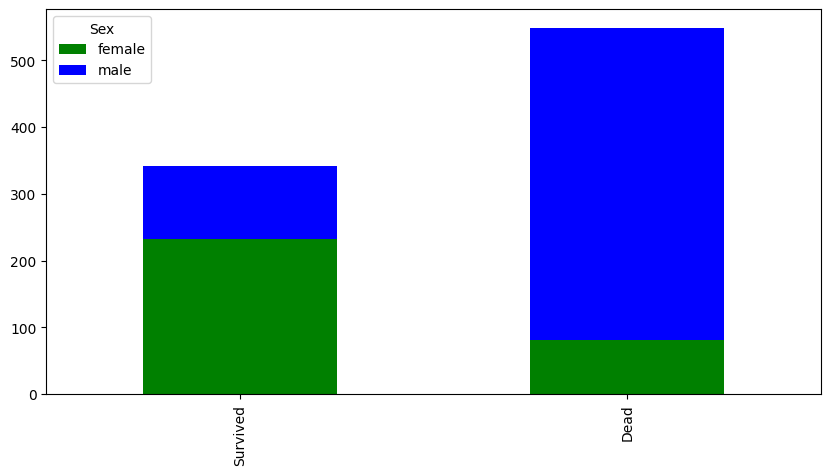

In [10]:
# @title 04. Plotting data for survived and dead passangers
#plt.subprocess()
# barplot_sns("Survived", "Sex")
bar_plot_with_group("Sex", clr=["green", "blue"])

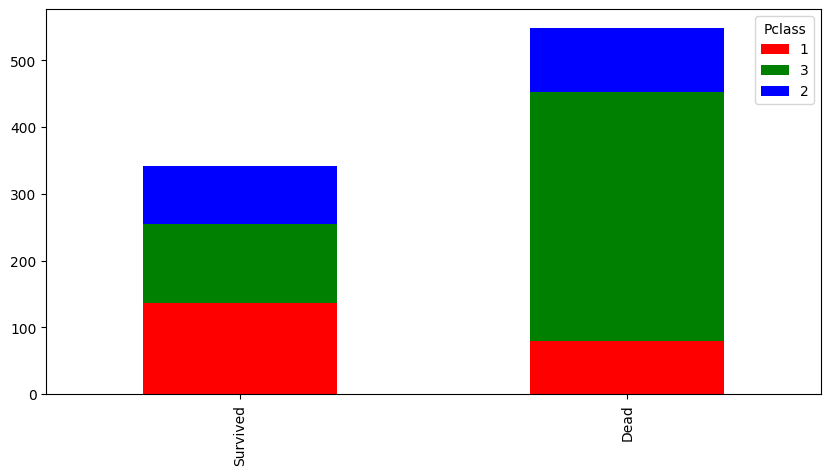

In [11]:
# @title 05. Plotting Pclass stacking feature
# barplot_sns("Survived", "Pclass")
bar_plot_with_group("Pclass", clr = ["red", "green", "blue"])

In [12]:
# @title 06. Generating an AgeClass column
# df['AgeClass'] = pd.cut(df['Age'], bins=[0, 16, 26, 36, 62, 100], labels=[0, 1, 2, 3, 4])
df['AgeClass'] = pd.cut(df['Age'], bins=[0, 16, 26, 36, 62, df["Age"].max()], labels=["0 to 16", "16 to 26", "26 to 36", "36 to 62", "more than 62"])

In [13]:
# @title 07. Dropping the Age column
df.drop(columns=['Age'], inplace=True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeClass'],
      dtype='object')

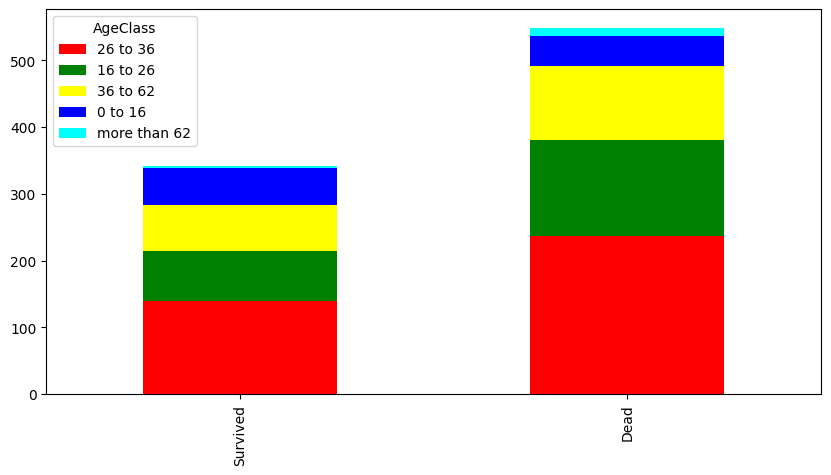

In [14]:
# @title 08. Darawing a stacked barplot for survived passangers with a feature
# barplot_sns("Survived", "AgeClass")
bar_plot_with_group("AgeClass", ["red", "green", "yellow", "blue", "cyan"])

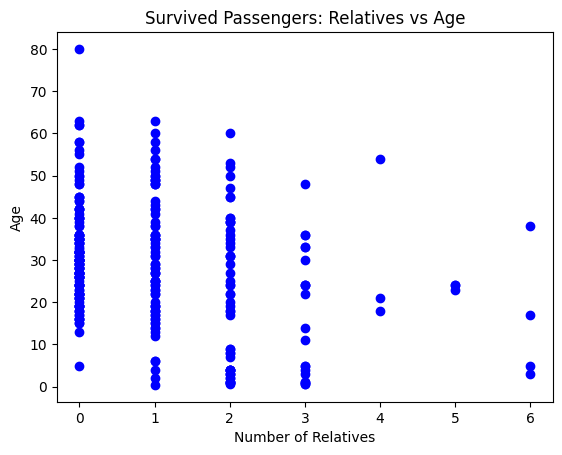

In [15]:
# @title Assignment for roll 36
df = df_main.copy() #retriving the original data
df['Number of Relatives'] = df['SibSp'] + df['Parch']
survived_passengers = df[df['Survived'] == 1]

#plotting can make a function**
plt.scatter(survived_passengers['Number of Relatives'], survived_passengers['Age'], color='blue')
plt.xlabel("Number of Relatives")
plt.ylabel("Age")
plt.title("Survived Passengers: Relatives vs Age")
plt.show()